`March, 28th 2022`

### **Exercise: Model Complexity in Linear Model**

**Use 'Admission_Predict' dataset.**

        - Features: 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA'
        - Target: 'Chance of Admit'

- Preprocess the data as needed and scale the data using StandardScaler.
- Split the data with ratio 80:20 and random_state = 42.

- Try ridge and lasso regression with several alpha values (100000, 10000, 1000, 100, 10, 1, 0.1, 0.01, 0.001).
  
- What is the best alpha for each model? Interpret the result!
  
- Compare the performance of both models according to their RMSE scores. Which one is better?

<hr>

**`Dataset Information`**

The dataset contains several parameters which are considered important during the application for Masters Programs.

- GRE Scores (out of 340)
- TOEFL Scores (out of 120)
- University Rating (out of 5)
- Statement of Purpose and Letter of Recommendation Strength (out of 5)
- Undergraduate GPA (out of 10)
- Research Experience (either 0 or 1)
- Chance of Admit (ranging from 0 to 1)

<hr>

### **Import Libraries**

In [1]:
# Import Libraries

import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression, Lasso, Ridge

from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings('ignore')

### **Load Dataset**

In [2]:
df = pd.read_csv('Admission_Predict.csv')
df

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67


### **Explore The Data**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


In [4]:
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [5]:
# Rename some columns, removing the unnecessary whitespace.
df = df.rename(columns={'LOR ': 'LOR', 'Chance of Admit ':'Chance of Admit'})

In [6]:
# Descriptive stats.
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [7]:
# Check missing values.
df.isna().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [8]:
# Check duplicated data.
df.duplicated().any()

False

In [9]:
# Remove an unnecessary column.
df.drop('Serial No.', axis=1, inplace=True)

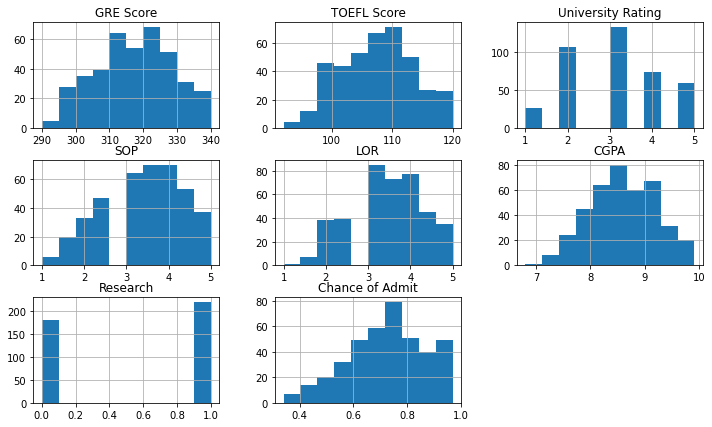

In [10]:
# Features data distribution.
df.hist(figsize=(12, 7));

In [11]:
# Check skewmess of the features.
skew = []
feature = []

for i in df.columns:
    feature.append(i)
    skew.append(df[i].skew())

pd.DataFrame(skew, feature, columns=['Skewness'])

,Skewness
GRE Score,-0.062893
TOEFL Score,0.057216
University Rating,0.171260
SOP,-0.275761
LOR,-0.106991
CGPA,-0.065991
Research,-0.191582
Chance of Admit,-0.353448


`Interpretation`

Skewness | Classification|
---------|----------------
-1 and -0.5 | Moderate negatively skewed
0.5 and 1   | Moderate positively skewed
<1 or >1    | Highly skewed

According to the skewness classification above, all the features are slightly skewed.

In [12]:
df.corr(method='spearman')

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
GRE Score,1.000000,0.831860,0.676265,0.613743,0.547786,0.831848,0.595911,0.815352
TOEFL Score,0.831860,1.000000,0.696868,0.652922,0.549405,0.825720,0.504322,0.795573
University Rating,0.676265,0.696868,1.000000,0.740387,0.653256,0.750562,0.454131,0.731977
SOP,0.613743,0.652922,0.740387,1.000000,0.727178,0.724348,0.443648,0.694715
LOR,0.547786,0.549405,0.653256,0.727178,1.000000,0.666012,0.400385,0.670562
CGPA,0.831848,0.825720,0.750562,0.724348,0.666012,1.000000,0.530265,0.878403
Research,0.595911,0.504322,0.454131,0.443648,0.400385,0.530265,1.000000,0.581742
Chance of Admit,0.815352,0.795573,0.731977,0.694715,0.670562,0.878403,0.581742,1.000000


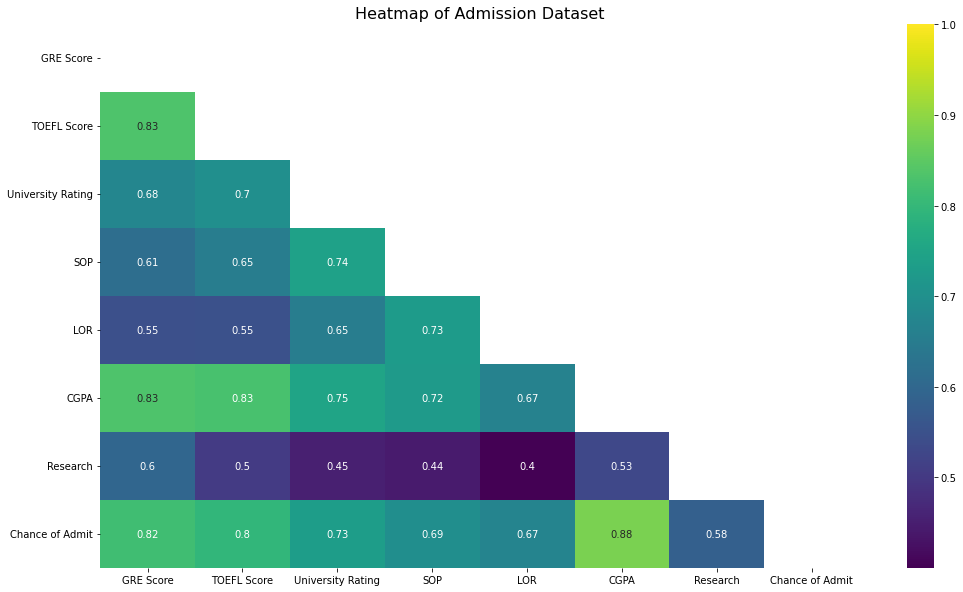

In [13]:
# Plot a heatmap to see correlation among numerical features.
mask = np.zeros_like(df.corr(method='spearman')) 
mask[np.triu_indices_from(mask)]=True

plt.figure(figsize=(17, 10))
plt.title('Heatmap of Admission Dataset', size=16)
sns.heatmap(df.corr(method='spearman'), cmap='viridis', annot=True, mask=mask, vmax=1);

`Interpretation`

Some of the features are strongly correlated. Later, we can see the lasso's power (Least Absolute Shrinkage & Selection Operator) to reduce insignificant feature(s) to the label.

### **Define X and y**

In [14]:
X = df.drop(columns=['Chance of Admit', 'Research'])
y = df['Chance of Admit']

In [15]:
X

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA
0,337,118,4,4.5,4.5,9.65
1,324,107,4,4.0,4.5,8.87
2,316,104,3,3.0,3.5,8.00
3,322,110,3,3.5,2.5,8.67
4,314,103,2,2.0,3.0,8.21
...,...,...,...,...,...,...
395,324,110,3,3.5,3.5,9.04
396,325,107,3,3.0,3.5,9.11
397,330,116,4,5.0,4.5,9.45
398,312,103,3,3.5,4.0,8.78


### **Data Splitting**

In [16]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size = 0.2,
    random_state = 42
)

### **Data Scaling**

In [17]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### **Ridge Regression**

In [18]:
# Ridge

alpha = [100000, 10000, 1000, 100, 10, 1, 0.1, 0.01, 0.001]
testing_rmse = []
training_rmse = []
score = 0

for i in range(len(alpha)):
   ridge = Ridge(alpha=alpha[i]) # model
   ridge.fit(X_train_scaled, y_train)

   y_predict_train = ridge.predict(X_train_scaled)
   training_rmse.append(np.sqrt(mean_squared_error(y_train, y_predict_train)))

   y_predict_test = ridge.predict(X_test_scaled)
   rmse_score = np.sqrt(mean_squared_error(y_test, y_predict_test))
   testing_rmse.append(rmse_score)

   if i==0:
       score = rmse_score
       best_alpha = alpha[i]

   if score > rmse_score:
       score = rmse_score
       best_alpha = alpha[i]

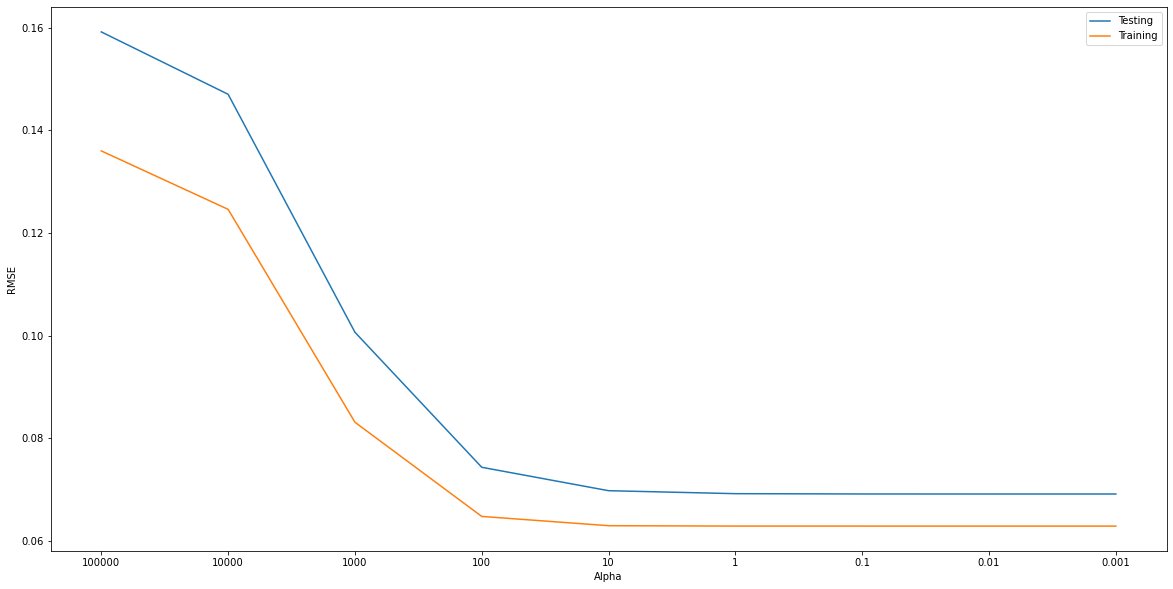

In [19]:
# Plot alpha vs RMSE.
length = range(len(alpha))

plt.figure(figsize=(20, 10))
sns.lineplot(length, testing_rmse)
sns.lineplot(length, training_rmse)
plt.legend(['Testing', 'Training'])
plt.xlabel('Alpha')
plt.ylabel('RMSE')
plt.xticks(length, alpha);

In [20]:
# Check coefficients value.
coef_ridge = pd.DataFrame({
    'Feature': list(X),
    'Feature_coef': ridge.coef_
})

In [21]:
coef_ridge.sort_values(by='Feature_coef', ascending=False)

,Feature,Feature_coef
5,CGPA,0.066511
0,GRE Score,0.026780
1,TOEFL Score,0.016825
4,LOR,0.014807
2,University Rating,0.009117
3,SOP,0.000226


In [22]:
print('The best alpha for ridge regression:', best_alpha)
print('RMSE score:', score)

The best alpha for ridge regression: 0.001
RMSE score: 0.06909962415313736


#### **Comparing RMSE**

In [23]:
# Fitting model with the best alpha.
ridge_reg = Ridge(alpha=best_alpha)
ridge_reg.fit(X_train_scaled, y_train)

Ridge(alpha=0.001)

In [24]:
# Predict.
y_reg_train = ridge_reg.predict(X_train_scaled)
y_reg_test = ridge_reg.predict(X_test_scaled)

In [25]:
coef_ridge_reg = pd.DataFrame({
    'Feature': list(X),
    'Feature_coef': ridge_reg.coef_
})

In [26]:
coef_ridge_reg.sort_values(by='Feature_coef', ascending=False)

,Feature,Feature_coef
5,CGPA,0.066511
0,GRE Score,0.026780
1,TOEFL Score,0.016825
4,LOR,0.014807
2,University Rating,0.009117
3,SOP,0.000226


In [27]:
print('Train set RMSE:', np.sqrt(mean_squared_error(y_train, y_reg_train)))
print('Test set RMSE:', np.sqrt(mean_squared_error(y_test, y_reg_test)))

Train set RMSE: 0.06284241642438144
Test set RMSE: 0.06909962415313736


#### **`Interpretation`**

- The alpha value is linearly related to the penalty rate given. The higher the alpha, the larger the penalty given to each variable.

- If the alpha value is too high, the model tends to underfit, where the RMSE scores of train and test set are relatively still high.

- According to the code result, the best alpha for the ridge is 0.001 with RMSE 0.069. However, as shown in the plot, it would not make any significant difference between training and test set error if we use alpha = 1 or 0.1.

#### **Experiment**

In [28]:
# Set a higher alpha.
ridge = Ridge(alpha=1000)
ridge.fit(X_train_scaled, y_train)

Ridge(alpha=1000)

In [29]:
pd.DataFrame({
    'Feature': list(X),
    'Coef': ridge.coef_
})

,Feature,Coef
0,GRE Score,0.015389
1,TOEFL Score,0.014450
2,University Rating,0.012175
3,SOP,0.010791
4,LOR,0.011025
5,CGPA,0.017119


`Interpretation`

From the instance above, even if we use a high value for alpha, ridge regression will never make the coefficients become 0.

### **Lasso Regression**

In [30]:
# Lasso

alpha = [100000, 10000, 1000, 100, 10, 1, 0.1, 0.01, 0.001]
testing_rmse = []
training_rmse = []
score = 0

for i in range(len(alpha)):
    lasso = Lasso(alpha=alpha[i])
    lasso.fit(X_train_scaled, y_train)
    
    y_predict_train = lasso.predict(X_train_scaled)
    training_rmse.append(np.sqrt(mean_squared_error(y_train, y_predict_train)))
    
    y_predict_test = lasso.predict(X_test_scaled)
    rmse_score = np.sqrt(mean_squared_error(y_test, y_predict_test))
    testing_rmse.append(rmse_score)
    
    if i==0:
        score = rmse_score
        best_alpha = alpha[i]
        
    if score > rmse_score:
        score = rmse_score
        best_alpha = alpha[i]

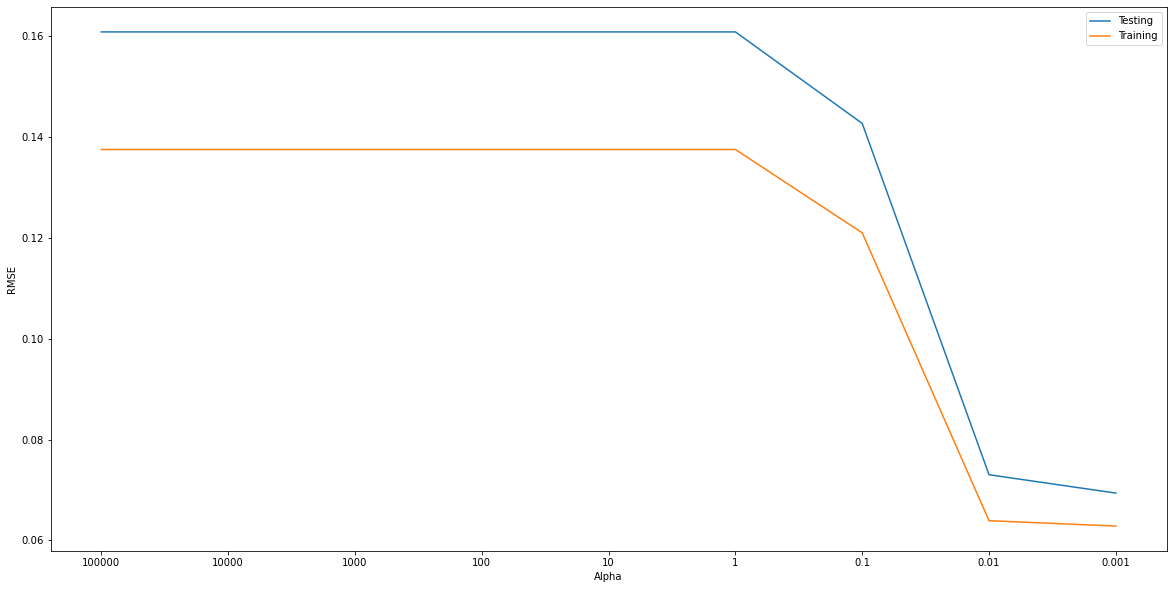

In [31]:
# Plot RMSE vs alpha.
length= range (len(alpha))

plt.figure(figsize=(20, 10))
sns.lineplot(length, testing_rmse)
sns.lineplot(length, training_rmse)
plt.legend(['Testing', 'Training'])
plt.xlabel('Alpha')
plt.ylabel('RMSE')
plt.xticks(length, alpha);

In [32]:
# Check coefficients value.
coef_lasso = pd.DataFrame({
    'Feature': list(X),
    'Feature_coef': lasso.coef_
})

In [33]:
coef_lasso.sort_values(by='Feature_coef', ascending=False)

,Feature,Feature_coef
5,CGPA,0.066704
0,GRE Score,0.026397
1,TOEFL Score,0.016528
4,LOR,0.014338
2,University Rating,0.008886
3,SOP,0.000024


In [34]:
print('The best alpha for lasso regression:', best_alpha)
print('RMSE score:', score)

The best alpha for lasso regression: 0.001
RMSE score: 0.06939261093838954


#### **Comparing RMSE**

In [35]:
# Fitting lasso model with the best alpha
lasso_reg = Lasso(alpha=best_alpha)
lasso_reg.fit(X_train_scaled, y_train)

Lasso(alpha=0.001)

In [36]:
# Predict.
y_lasso_reg_train = lasso_reg.predict(X_train_scaled)
y_lasso_reg_test = lasso_reg.predict(X_test_scaled)

In [37]:
coef_lasso_reg = pd.DataFrame({
    'Feature': list(X),
    'Feature_coef': lasso_reg.coef_
})

In [38]:
coef_lasso_reg.sort_values(by='Feature_coef', ascending=False)

,Feature,Feature_coef
5,CGPA,0.066704
0,GRE Score,0.026397
1,TOEFL Score,0.016528
4,LOR,0.014338
2,University Rating,0.008886
3,SOP,0.000024


In [39]:
print('Train set RMSE:', np.sqrt(mean_squared_error(y_train, y_lasso_reg_train)))
print('Test set RMSE:', np.sqrt(mean_squared_error(y_test, y_lasso_reg_test)))

Train set RMSE: 0.06285350406313453
Test set RMSE: 0.06939261093838954


#### **`Interpretation`**

- Similar to the ridge regression, the higher the alpha, the model tends to be more underfitting because the RMSE scores of training and test set are high.

- According to the code, we got 0.001 as the best alpha, the same value we got in the ridge. However, as the best alpha is relatively low, the penalty given to each feature is also low as we can see that with alpha = 0.001, there is no feature with a coefficient value equal to 0.

## **Experiment**

In [52]:
# Set a high alpha.
lasso = Lasso(alpha=1000)
lasso.fit(X_train_scaled, y_train)

Lasso(alpha=1000)

In [53]:
pd.DataFrame({
    'Feature': list(X),
    'Coef': lasso.coef_
})

,Feature,Coef
0,GRE Score,0.0
1,TOEFL Score,0.0
2,University Rating,0.0
3,SOP,0.0
4,LOR,0.0
5,CGPA,0.0


`Interpretation`

- As we can see, Lasso can play as a feature selector if we set a high alpha value. 

- Keep in mind that the higher the alpha, the larger the penalty given to each feature. From the example above, if we set alpha = 1000, all coefficients become 0.

### **Conclusion**

**`1. Ridge regression`**
   - The best alpha = 0.001
   - Test set RMSE = 0.069099

**`2. Lasso regression`**
   - The best alpha = 0.001
   - Test set RMSE = 0.069392

`Since the alpha is the same, thus the model performance is pretty similar for this case.`
<hr>